* **LSTM** 셀은 타입스텝이 긴 데이터를 효과적으로 학습하기 위해 고안된 순환층이다. 입력 게이트, 삭제 게이트, 출력 게이트 역할을 하는 작은 셀이 포함되어 있다. 
* LSTM 셀은 은닉 상태 외에 **셀 상태**를 출력한다. 셀 상태는 다음 층으로 전달되지 않으며 현재 셀에서만 순환한다. 
* **GRU** 셀은 LSTM 셀의 간소화 버전으로 생각할 수 있지만 LSTM 셀에 못지않는 성능을 낸다. 

# Tensorflow

* **LSTM**은 LSTM 셀을 사용한 순환층 클래스이다. 
  * 첫 번째 매개변수에 뉴런의 개수를 지정한다. 
  * dropout 매개변수에서 입력에 대한 드롭아웃 비율을 지정할 수 있다.
  * return_sequences 매개변수에서 모든 타입스텝의 은닉 상태를 출력할지 결정한다. 기본값은 False이다. 

* **GRU**는 GRU 셀을 사용한 순환층 클래스이다. 
  * 첫 번째 매개변수에 뉴런의 개수를 지정한다. 
  * dropout 매개변수에서 입력에 대한 드롭아웃 비율을 지정할 수 있다. 
  * return_sequences 매개변수에서 모든 타임스텝의 은닉 상태를 출력할지 결정한다. 기본값은 False이다. 

In [2]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [3]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [4]:
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [6]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 6s 10ms/step - loss: 0.6924 - accuracy: 0.5398 - val_loss: 0.6915 - val_accuracy: 0.5616
Epoch 2/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6888 - accuracy: 0.6102 - val_loss: 0.6850 - val_accuracy: 0.6590
Epoch 3/100
313/313 [==============================] - 2s 8ms/step - loss: 0.6666 - accuracy: 0.7018 - val_loss: 0.6332 - val_accuracy: 0.7146
Epoch 4/100
313/313 [==============================] - 2s 8ms/step - loss: 0.6090 - accuracy: 0.7088 - val_loss: 0.5961 - val_accuracy: 0.7152
Epoch 5/100
313/313 [==============================] - 2s 8ms/step - loss: 0.5801 - accuracy: 0.7305 - val_loss: 0.5694 - val_accuracy: 0.7352
Epoch 6/100
313/313 [==============================] - 2s 8ms/step - loss: 0.5534 - accuracy: 0.7506 - val_loss: 0.5452 - val_accuracy: 0.7490
Epoch 7/100
313/313 [==============================] - 3s 8ms/step - loss: 0.5288 - accuracy: 0.7642 - val_loss: 0.5238 - val_accuracy: 0.756

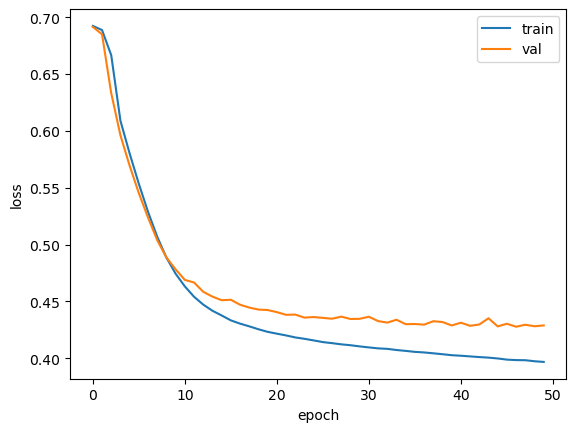

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [8]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [9]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 4s 10ms/step - loss: 0.6926 - accuracy: 0.5167 - val_loss: 0.6916 - val_accuracy: 0.5784
Epoch 2/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6899 - accuracy: 0.6042 - val_loss: 0.6874 - val_accuracy: 0.6360
Epoch 3/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6802 - accuracy: 0.6633 - val_loss: 0.6663 - val_accuracy: 0.6876
Epoch 4/100
313/313 [==============================] - 2s 8ms/step - loss: 0.6364 - accuracy: 0.7027 - val_loss: 0.6109 - val_accuracy: 0.7096
Epoch 5/100
313/313 [==============================] - 3s 8ms/step - loss: 0.5999 - accuracy: 0.7132 - val_loss: 0.5895 - val_accuracy: 0.7196
Epoch 6/100
313/313 [==============================] - 3s 8ms/step - loss: 0.5797 - accuracy: 0.7283 - val_loss: 0.5691 - val_accuracy: 0.7362
Epoch 7/100
313/313 [==============================] - 3s 9ms/step - loss: 0.5604 - accuracy: 0.7404 - val_loss: 0.5522 - val_accuracy: 0.744

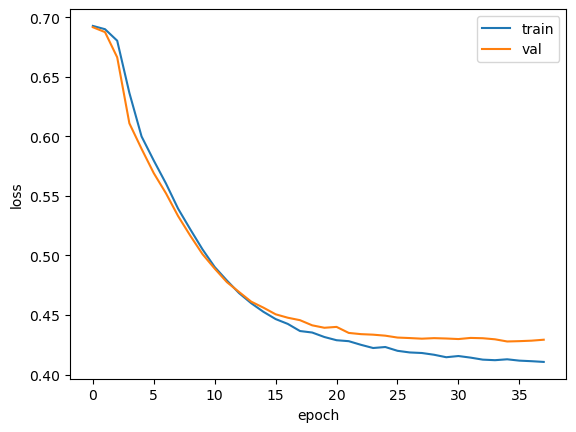

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [11]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

In [12]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_3 (LSTM)               (None, 8)                 544       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [13]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model3.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 6s 15ms/step - loss: 0.6930 - accuracy: 0.5196 - val_loss: 0.6927 - val_accuracy: 0.5502
Epoch 2/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6922 - accuracy: 0.5781 - val_loss: 0.6914 - val_accuracy: 0.6350
Epoch 3/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6891 - accuracy: 0.6327 - val_loss: 0.6848 - val_accuracy: 0.6624
Epoch 4/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6691 - accuracy: 0.6460 - val_loss: 0.6363 - val_accuracy: 0.6934
Epoch 5/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6004 - accuracy: 0.7139 - val_loss: 0.5703 - val_accuracy: 0.7268
Epoch 6/100
313/313 [==============================] - 4s 12ms/step - loss: 0.5576 - accuracy: 0.7344 - val_loss: 0.5470 - val_accuracy: 0.7396
Epoch 7/100
313/313 [==============================] - 4s 12ms/step - loss: 0.5300 - accuracy: 0.7510 - val_loss: 0.5172 - val_accuracy:

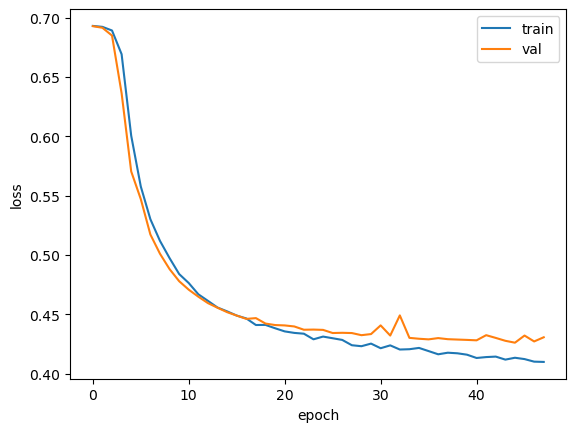

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [15]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

In [16]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [17]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model4.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 4s 9ms/step - loss: 0.6920 - accuracy: 0.5350 - val_loss: 0.6911 - val_accuracy: 0.5586
Epoch 2/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6896 - accuracy: 0.5646 - val_loss: 0.6883 - val_accuracy: 0.5754
Epoch 3/100
313/313 [==============================] - 2s 8ms/step - loss: 0.6854 - accuracy: 0.5938 - val_loss: 0.6836 - val_accuracy: 0.5976
Epoch 4/100
313/313 [==============================] - 2s 8ms/step - loss: 0.6785 - accuracy: 0.6158 - val_loss: 0.6758 - val_accuracy: 0.6194
Epoch 5/100
313/313 [==============================] - 2s 8ms/step - loss: 0.6678 - accuracy: 0.6346 - val_loss: 0.6636 - val_accuracy: 0.6342
Epoch 6/100
313/313 [==============================] - 2s 8ms/step - loss: 0.6512 - accuracy: 0.6518 - val_loss: 0.6448 - val_accuracy: 0.6574
Epoch 7/100
313/313 [==============================] - 2s 7ms/step - loss: 0.6239 - accuracy: 0.6770 - val_loss: 0.6132 - val_accuracy: 0.6820

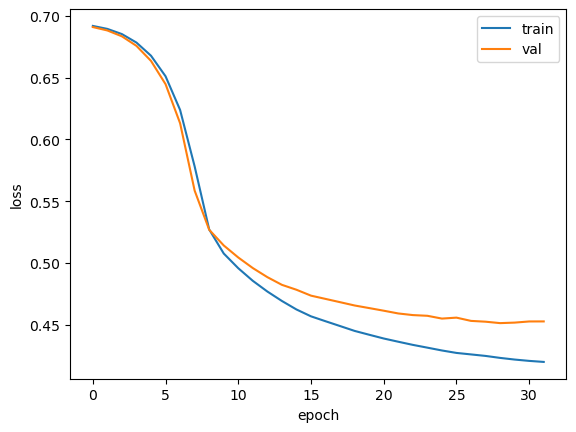

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()